First oder PDEs have some unique properties, including the occurence of shocks (aka jump discontinuities). We will look at a few examples, including the kinematic wave equation, shown here, and a countercurrent separation unit.

First order PDEs occur when applying a conservation law (e.g. mass) under transient conditions. For example, the mass conservation law states that the accumulation rate at any time and position is equal to the flow rates entering and leaving that position:

$$\frac{\partial \gamma}{\partial t} + \frac{\partial \phi}{\partial x} = 0 $$

where $\gamma$ is the concentration (per unit volume) and $\phi$ (per unit area per unit time) is the mass flux.

The PDE is *homogeneous* when there is no internal generation (no term on the RHS) and no exchange with the external environment (homogeneous BCs).

The solution is usually carried out by coupling the two variables e.g.

$$\phi = \phi(\gamma) $$

If we plug this into the previou equation, we get

$$\frac{\partial \gamma}{\partial t} + c\frac{\partial \gamma}{\partial x} = 0 $$

where $c = d \phi/ d \gamma$, the velocity at which a constant value of $gamma$ propagates along the x direction, or the *wave velocity*. 

#### Chromatography Model

In this case,

$$\gamma = \epsilon C + (1 - \epsilon)F(C) $$
$$\phi = vC $$

Thus, the wave velocity is

$$c = V = \frac{v}{\epsilon + (1 - \epsilon)(dF/dC)} $$ 

The chromatography model is given by:

$$V\frac{\partial C}{\partial x} + \frac{\partial C}{\partial t} = 0, 0<x<L, t>0 $$

with the following ICs:

$$C = C^0(x) \text{ along curve } I_1: 0 \le x \le L, t=0 $$
$$C = C^i(t) \text{ along curve } I_2: x = 0, t>0 $$

We apply the method of lines:

$$\frac{dx}{ds} = V $$
$$\frac{dt}{ds} = 1 $$
$$\frac{dC}{ds} = 0 $$

The IC on curve 1 becomes

$$x = \xi, t = 0, C = C^0(\xi), 0 \le \xi \le L $$

Integrating our line equations with this IC gives:

$$x = Vs + \xi$$
$$t = s $$
$$C = C^0(\xi) $$

Eliminating s and $\xi$ gives

$$C = C^0(x - Vt) $$

This is valid in the region

$$0 \le t \le x/V $$

The second branch of the solution comes from the second IC:

$$x = 0, t = \xi, C = C^i(\xi), \xi > 0 $$

Integrating the line equations with this BC gives:

$$x = Vs $$
$$t = s + \xi $$
$$C = C^i(\xi) $$

Eliminating s and $\xi$ gives:

$$C = C^i(t - \frac{x}{V}) $$

which applies for $t > x/V$

In sum:

$$C = C^0(x - Vt), 0 \le t \le x/V $$
$$C = C^i(t - \frac{x}{V}),  t > x/V $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [19]:
x = np.linspace(0, 1, 400)
t = np.linspace(0, 2, 800)

c0 = 1
ci = 2
V = 1
xv, tv = np.meshgrid(x, t)
c = 0*xv + 1 #Inititalize concentrations

In [20]:
c = ci*c
c[tv <= xv/V] = c0

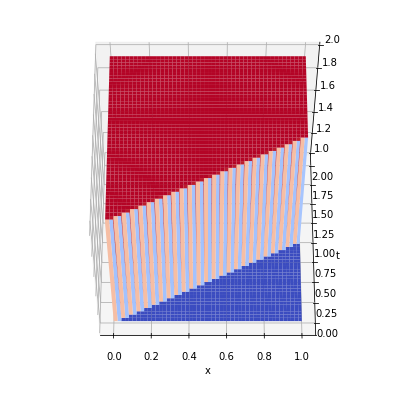

In [21]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, c, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=60, azim=270)

In [22]:
from matplotlib import animation, rc
from IPython.display import HTML

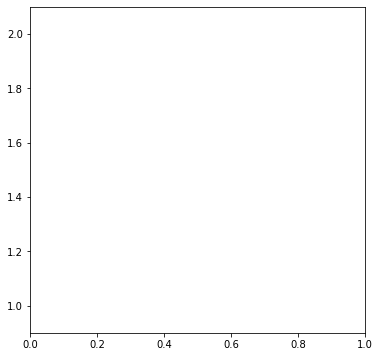

In [45]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim((0, 1))
ax.set_ylim((0.9, 2.1))


line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    cn = c[i, :]
    line.set_data(x, cn)
    
    return (line,)

In [46]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=799, interval=5, blit=True)
HTML(anim.to_html5_video())

In [83]:
x = np.linspace(0, 1, 400)
t = np.linspace(0, 2, 800)
#c0 = -4*(x - 0.5)**2 + 1
#ci = np.exp(-4*t)
c0 = 0*x+1
ci = 1 - t

Text(0, 0.5, 'C')

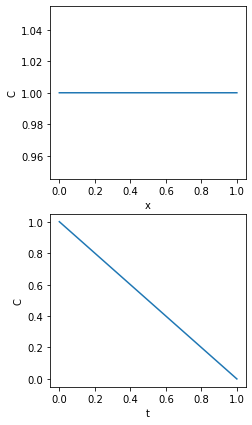

In [77]:
fig, ax = plt.subplots(nrows=2, figsize=(3.5, 7))

ax[0].plot(x, c0)
ax[0].set_xlabel('x')
ax[0].set_ylabel('C')

ax[1].plot(x, ci)
ax[1].set_xlabel('t')
ax[1].set_ylabel('C')

In [84]:
V = 1

xv, tv = np.meshgrid(x, t)
c = 0*xv
def c0(x):
    #c = -4*(x - 0.5)**2 + 1
    c = 0*x+1
    return c

def ci(t):
    #c = np.exp(-4*t)
    c[1 - t > 0] = 1 - t[1 - t > 0]    
    c[1 - t <= 0] = 0*t[1 - t <= 0]
    return c

c = ci(tv - xv/V)
c[tv <= xv/V] = c0(xv - V*tv)[tv <= xv/V]

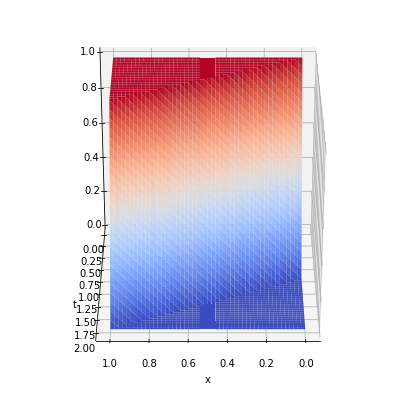

In [86]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv, tv, c, cmap=cm.coolwarm)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.view_init(elev=30, azim=-270)

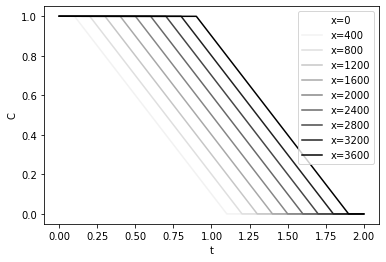

In [91]:
fig, ax = plt.subplots()
colors = cm.Greys(np.linspace(0, 1, 10))

counter = 0
for i in range(0, x.shape[0], 400):
    ax.plot(t, c[:, i], c = colors[counter], label='x={}'.format(i))
    counter += 1

ax.set_xlabel('t')
ax.set_ylabel('C')
ax.legend()

In [90]:
c[:, i].shape

(8000,)

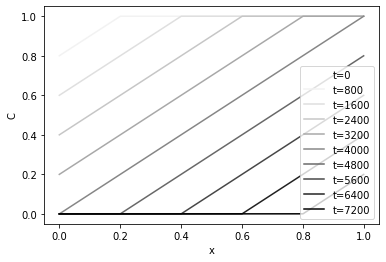

In [93]:
fig, ax = plt.subplots()
colors = cm.Greys(np.linspace(0, 1, 10))

counter = 0
for i in range(0, t.shape[0], 800):
    ax.plot(x, c[i, :], c = colors[counter], label='t={}'.format(i))
    counter += 1

ax.set_xlabel('x')
ax.set_ylabel('C')
ax.legend()

In the region below $t = x/V$, the solution is determined by the initial condition. For any given x, the value of C is equal to the initial condition at $\hat{x} = x - Vt$, kind of like the original initial condition is "floating" at given velocity V.

For any $t > x/V$, all memory of the initial condition is lost, and depends only on the inlet condition.